## Importing the Data


In [15]:

# Import the necessary libraries
import pandas as pd

# Define the file paths
subdirectory = "pickle_data"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print()
print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())


Loaded Training features dimensions: (6018, 21)
Loaded Validation features dimensions: (1504, 21)

Loaded Training labels dimensions: (6018, 1)
Loaded Validation labels dimensions: (1504, 1)

First few rows of loaded training features:
   Warengruppe_2  Warengruppe_3  Warengruppe_4  Warengruppe_5  Warengruppe_6  \
0              0              1              0              0              0   
1              0              0              1              0              0   
2              0              1              0              0              0   
3              0              0              0              1              0   
4              0              0              1              0              0   

   Temperatur_Kategorie_2  Temperatur_Kategorie_3  Jahreszeit_FSHW_2  \
0                       1                       0                  0   
1                       1                       0                  0   
2                       0                       1                  

In [16]:
# Convert DataFrames to numpy arrays
training_features_array = training_features.to_numpy()
training_labels_array = training_labels.to_numpy().flatten()  # Flatten in case labels are a DataFrame with one column

print("Training Features Array:")
print(training_features_array[:5])

Training Features Array:
[[0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 9.410e+01 6.250e-02]
 [0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 9.580e+01 1.250e-01]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 1.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 9.550e+01 9.375e-02]
 [0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 9.510e+01 6.250e-02]
 [0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 0.000e+00 0.0

## Defining the Neural Network



In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(input_shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dropout(0.2),  
  Dense(4, activation='relu'),
  Dropout(0.2),  
  Dense(1)
])

model.summary()



/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 21)             │            84 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 311 (1.21 KB)

 Non-trainable params: 42 (168.00 B)

## Compiling and Training the Model

We will compile the model using Mean Squared Error (MSE) as the loss function and Adam optimizer. The model is then trained using the training data.

In [18]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=18,
                    validation_data=(validation_features, validation_labels))

Epoch 1/18
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 64509.7969 - val_loss: 58402.3711
Epoch 2/18
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 54924.3281 - val_loss: 17678.8516
Epoch 3/18
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18226.1934 - val_loss: 10855.7578
Epoch 4/18
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15128.9512 - val_loss: 9253.5361
Epoch 5/18
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12742.2559 - val_loss: 8074.2080
Epoch 6/18
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13475.6035 - val_loss: 7458.3174
Epoch 7/18
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11311.6924 - val_loss: 7415.2139
Epoch 8/18
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11100.9863 - val_loss: 7049.8052
Epoch 9/18
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12747.6582 - val_loss: 7001.2925
Epoch 10/18
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11372.6553 - val_loss: 6832.9038
Epoch 11/18
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11419

## Saving the Trained Model

After training, it's a good practice to save the model for future use.

In [19]:
model.save("python_model.h5")

## Plotting Training History

Visualizing the training and validation loss can help us understand the model's performance over time.

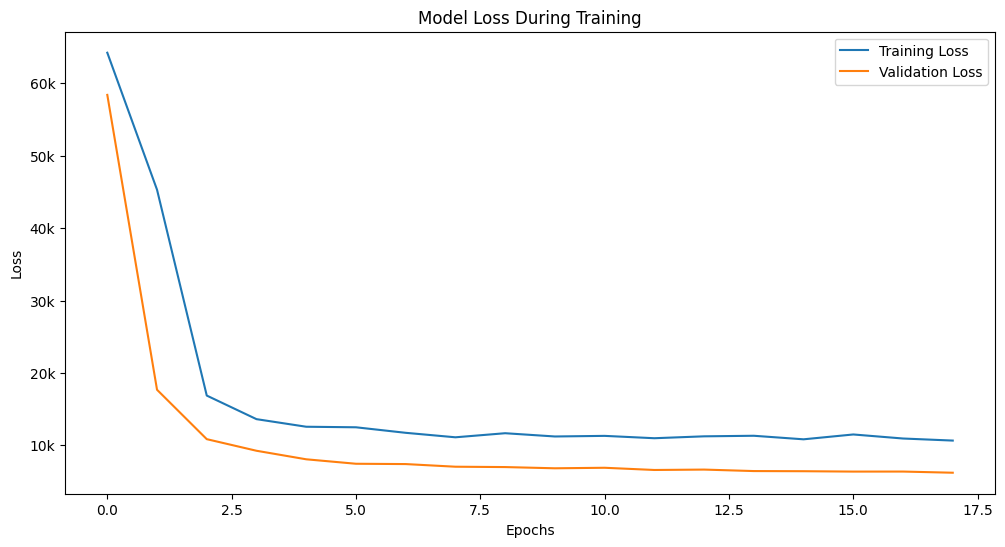

In [20]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def thousands(x, pos):
    return '%1.0fk' % (x * 1e-3)

formatter = FuncFormatter(thousands)

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()


## Making Predictions and Evaluating the Model



189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step
MAPE on the Training Data: 27.18%
MAPE on the Validation Data: 28.57%

MAPE on the Training Data ('Warengruppe_1 = 1): 29.87%
MAPE on the Validation Data ('Warengruppe_1 = 1): 31.55%
MAPE on the Training Data ('Warengruppe_2 = 1): 18.72%
MAPE on the Validation Data ('Warengruppe_2 = 1): 18.80%
MAPE on the Training Data ('Warengruppe_3 = 1): 21.93%
MAPE on the Validation Data ('Warengruppe_3 = 1): 18.62%
MAPE on the Training Data ('Warengruppe_4 = 1): 30.40%
MAPE on the Validation Data ('Warengruppe_4 = 1): 30.98%
MAPE on the Training Data ('Warengruppe_5 = 1): 16.06%
MAPE on the Validation Data ('Warengruppe_5 = 1): 16.02%
MAPE on the Training Data ('Warengruppe_6 = 1): 58.30%
MAPE on the Validation Data ('Warengruppe_6 = 1): 59.59%
[29.868595851005875, 18.716350740625742, 21.928666165072208, 30.402066693974128, 16.062760561948696, 58.29723879195768]
[31.554222999219743, 18.799421961185274, 18.62420701172

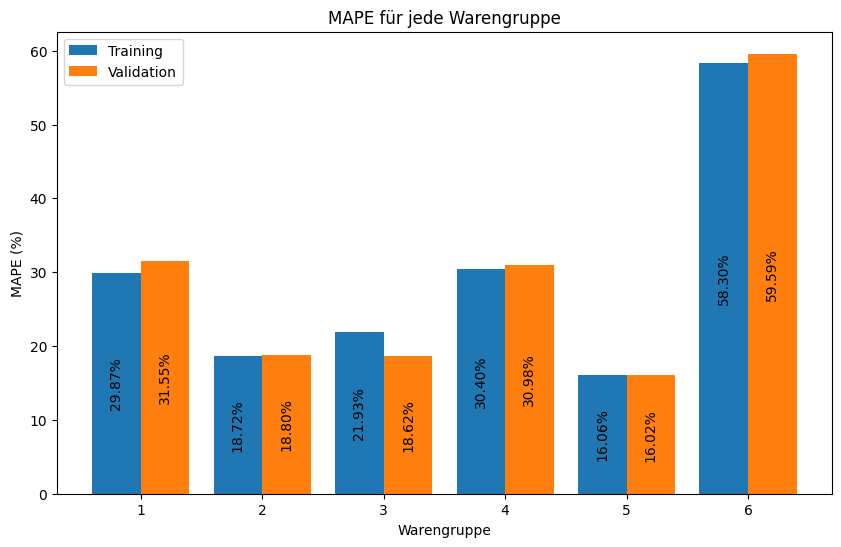

In [21]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")
print('')


mape_training = []
mape_validation = []

training_mask = (training_features['Warengruppe_2'] == 0) & (training_features['Warengruppe_3'] == 0) & (training_features['Warengruppe_4'] == 0) & (training_features['Warengruppe_5']) == 0 & (training_features['Warengruppe_6'] == 0)
validation_mask =(validation_features['Warengruppe_2'] == 0) & (validation_features['Warengruppe_3'] == 0) & (validation_features['Warengruppe_4'] == 0) & (validation_features['Warengruppe_5']) == 0 & (validation_features['Warengruppe_6'] == 0)
filtered_training_labels = training_labels[training_mask]
filtered_training_predictions = training_predictions[training_mask]
filtered_validation_labels = validation_labels[validation_mask]
filtered_validation_predictions = validation_predictions[validation_mask]
print(f"MAPE on the Training Data ('Warengruppe_1 = 1): {mape(filtered_training_labels, filtered_training_predictions):.2f}%")
print(f"MAPE on the Validation Data ('Warengruppe_1 = 1): {mape(filtered_validation_labels, filtered_validation_predictions):.2f}%")
mape_training.append(mape(filtered_training_labels, filtered_training_predictions))
mape_validation.append(mape(filtered_validation_labels, filtered_validation_predictions))

training_mask = training_features['Warengruppe_2'] == 1
validation_mask = validation_features['Warengruppe_2'] == 1
filtered_training_labels = training_labels[training_mask]
filtered_training_predictions = training_predictions[training_mask]
filtered_validation_labels = validation_labels[validation_mask]
filtered_validation_predictions = validation_predictions[validation_mask]
print(f"MAPE on the Training Data ('Warengruppe_2 = 1): {mape(filtered_training_labels, filtered_training_predictions):.2f}%")
print(f"MAPE on the Validation Data ('Warengruppe_2 = 1): {mape(filtered_validation_labels, filtered_validation_predictions):.2f}%")
mape_training.append(mape(filtered_training_labels, filtered_training_predictions))
mape_validation.append(mape(filtered_validation_labels, filtered_validation_predictions))

training_mask = training_features['Warengruppe_3'] == 1
validation_mask = validation_features['Warengruppe_3'] == 1
filtered_training_labels = training_labels[training_mask]
filtered_training_predictions = training_predictions[training_mask]
filtered_validation_labels = validation_labels[validation_mask]
filtered_validation_predictions = validation_predictions[validation_mask]
print(f"MAPE on the Training Data ('Warengruppe_3 = 1): {mape(filtered_training_labels, filtered_training_predictions):.2f}%")
print(f"MAPE on the Validation Data ('Warengruppe_3 = 1): {mape(filtered_validation_labels, filtered_validation_predictions):.2f}%")
mape_training.append(mape(filtered_training_labels, filtered_training_predictions))
mape_validation.append(mape(filtered_validation_labels, filtered_validation_predictions))

training_mask = training_features['Warengruppe_4'] == 1
validation_mask = validation_features['Warengruppe_4'] == 1
filtered_training_labels = training_labels[training_mask]
filtered_training_predictions = training_predictions[training_mask]
filtered_validation_labels = validation_labels[validation_mask]
filtered_validation_predictions = validation_predictions[validation_mask]
print(f"MAPE on the Training Data ('Warengruppe_4 = 1): {mape(filtered_training_labels, filtered_training_predictions):.2f}%")
print(f"MAPE on the Validation Data ('Warengruppe_4 = 1): {mape(filtered_validation_labels, filtered_validation_predictions):.2f}%")
mape_training.append(mape(filtered_training_labels, filtered_training_predictions))
mape_validation.append(mape(filtered_validation_labels, filtered_validation_predictions))

training_mask = training_features['Warengruppe_5'] == 1
validation_mask = validation_features['Warengruppe_5'] == 1
filtered_training_labels = training_labels[training_mask]
filtered_training_predictions = training_predictions[training_mask]
filtered_validation_labels = validation_labels[validation_mask]
filtered_validation_predictions = validation_predictions[validation_mask]
print(f"MAPE on the Training Data ('Warengruppe_5 = 1): {mape(filtered_training_labels, filtered_training_predictions):.2f}%")
print(f"MAPE on the Validation Data ('Warengruppe_5 = 1): {mape(filtered_validation_labels, filtered_validation_predictions):.2f}%")
mape_training.append(mape(filtered_training_labels, filtered_training_predictions))
mape_validation.append(mape(filtered_validation_labels, filtered_validation_predictions))

training_mask = training_features['Warengruppe_6'] == 1
validation_mask = validation_features['Warengruppe_6'] == 1
filtered_training_labels = training_labels[training_mask]
filtered_training_predictions = training_predictions[training_mask]
filtered_validation_labels = validation_labels[validation_mask]
filtered_validation_predictions = validation_predictions[validation_mask]
print(f"MAPE on the Training Data ('Warengruppe_6 = 1): {mape(filtered_training_labels, filtered_training_predictions):.2f}%")
print(f"MAPE on the Validation Data ('Warengruppe_6 = 1): {mape(filtered_validation_labels, filtered_validation_predictions):.2f}%")
mape_training.append(mape(filtered_training_labels, filtered_training_predictions))
mape_validation.append(mape(filtered_validation_labels, filtered_validation_predictions))

print(mape_training)
print(mape_validation)


plt.figure(figsize=(10, 6))
bar_width = 0.4
warengruppen = np.arange(1, 7)

# Balken für Training
training_bars = plt.bar(warengruppen - bar_width/2, mape_training, width=bar_width, label='Training', align='center')

# Balken für Validation
validation_bars = plt.bar(warengruppen + bar_width/2, mape_validation, width=bar_width, label='Validation', align='center')

plt.xlabel('Warengruppe')
plt.ylabel('MAPE (%)')
plt.title('MAPE für jede Warengruppe')
plt.xticks(warengruppen)
plt.legend()

# Werte innerhalb der Balken und um 90 Grad gedreht anzeigen
for bars in [training_bars, validation_bars]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height / 2, f'{height:.2f}%', ha='center', va='center', rotation=90)

plt.show()


## Export Predictions

In [22]:
# Import Data from DataPreparation

kaggledata = pd.read_csv('kaggle_sample_nn_final.csv')

print(kaggledata.head())

kaggledata_features = ['Warengruppe_2', 'Warengruppe_3', 'Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6', 'Temperatur_Kategorie_2', 'Temperatur_Kategorie_3', 'Jahreszeit_FSHW_2', 'Jahreszeit_FSHW_3', 'Jahreszeit_FSHW_4', 'Wochentag_MDMDFSS_2', 'Wochentag_MDMDFSS_3', 'Wochentag_MDMDFSS_4', 'Wochentag_MDMDFSS_5', 'Wochentag_MDMDFSS_6', 'Verbraucherpreisindex', 'FerienSH', 'Wochenende', 'Feiertag', 'Windgeschwindigkeit_N', 'Saison_Warengruppe']


vorhersage_daten = kaggledata[kaggledata_features]
vorhersagen = model.predict(vorhersage_daten)
kaggledata = kaggledata.assign(Umsatz=vorhersagen)

# Wählen Sie nur die Spalten 'id' und 'Umsatz' aus
export_daten = kaggledata[['id', 'Umsatz']]

# Exportieren Sie den DataFrame in eine CSV-Datei
export_daten.to_csv('kaggle_predictions_nn_final.csv', index=False)

        id       Datum  Warengruppe_2  Warengruppe_3  Warengruppe_4  \
0  1808011  2018-08-01              0              0              0   
1  1808021  2018-08-02              0              0              0   
2  1808031  2018-08-03              0              0              0   
3  1808041  2018-08-04              0              0              0   
4  1808051  2018-08-05              0              0              0   

   Warengruppe_5  Warengruppe_6  Temperatur_Kategorie_2  \
0              0              0                       0   
1              0              0                       0   
2              0              0                       0   
3              0              0                       0   
4              0              0                       0   

   Temperatur_Kategorie_3  Jahreszeit_FSHW_2  ...  Wochentag_MDMDFSS_3  \
0                       0                  0  ...                    0   
1                       1                  1  ...                    1